In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress specific warning for KMeans on Windows
warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak")

In [3]:
# Load the dataset
# Replace 'your_customer_data.csv' with your dataset path
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
# Select relevant features (e.g., Annual Income and Spending Score) for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
# Step 1: Data Normalization
# Normalizing data ensures that each feature contributes equally to the clustering process
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

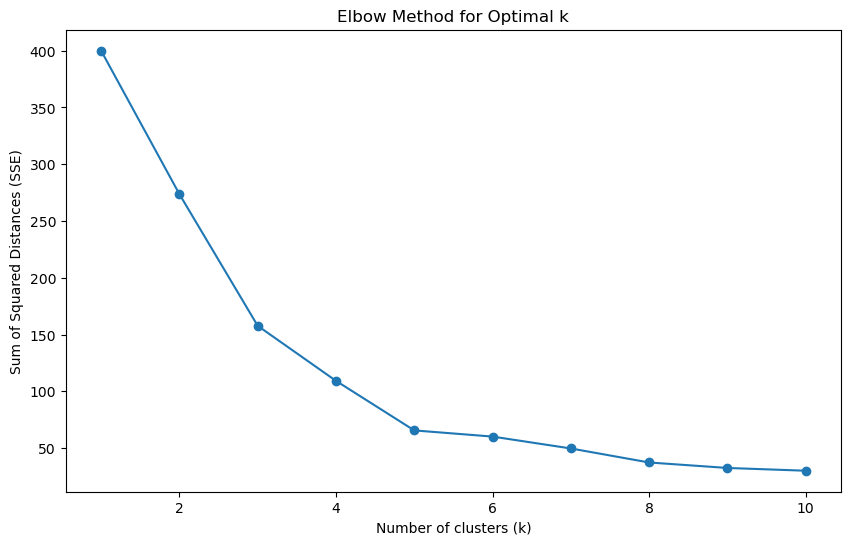

In [10]:
# Step 2: Determine Optimal Number of Clusters (k) using the Elbow Method
sse = []  # Sum of squared distances
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Graph to identify the best k
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choosing k based on the elbow point, e.g., k=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [12]:
# Step 3: Evaluate the Clustering with Silhouette Score
# Silhouette Score ranges from -1 to 1; higher values indicate better-defined clusters
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score for k={optimal_k}: {sil_score}")

Silhouette Score for k=4: 0.49434988482196784


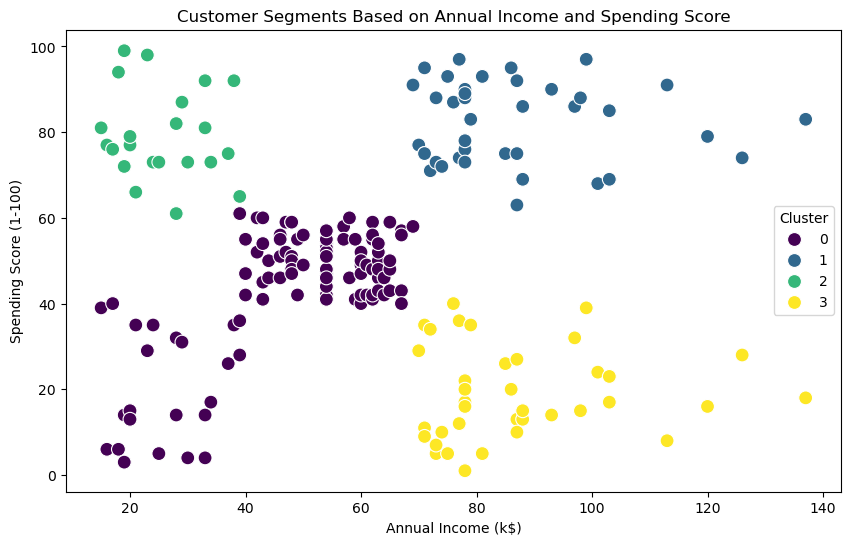

In [14]:
# Step 4: Visualize the Clusters
# Scatter plot of the clusters based on Annual Income and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='viridis', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.legend(title='Cluster')
plt.show()

In [16]:
# Step 5: Analyze the Cluster Centers
# Display the cluster centroids to understand the characteristics of each segment
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)  # Transform back to original scale
centroid_df = pd.DataFrame(centroids_original, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print("Cluster Centroids (in original scale):")
print(centroid_df)

Cluster Centroids (in original scale):
   Annual Income (k$)  Spending Score (1-100)
0           48.168317               43.396040
1           86.538462               82.128205
2           25.727273               79.363636
3           87.000000               18.631579


In [18]:
# Step 6: Summarize Each Cluster (Optional)
# Here, provide a brief analysis of each cluster
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster} Summary:")
    print(f"Average Annual Income: {cluster_data['Annual Income (k$)'].mean():.2f}")
    print(f"Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.2f}")
    print(f"Number of Customers: {len(cluster_data)}")

# Optional: Save the results to a new CSV file
df.to_csv('clustered_customers.csv', index=False)
print("\nClustered customer data has been saved to 'clustered_customers.csv'")


Cluster 0 Summary:
Average Annual Income: 48.17
Average Spending Score: 43.40
Number of Customers: 101

Cluster 1 Summary:
Average Annual Income: 86.54
Average Spending Score: 82.13
Number of Customers: 39

Cluster 2 Summary:
Average Annual Income: 25.73
Average Spending Score: 79.36
Number of Customers: 22

Cluster 3 Summary:
Average Annual Income: 87.00
Average Spending Score: 18.63
Number of Customers: 38

Clustered customer data has been saved to 'clustered_customers.csv'
